In [1]:
import numpy as np
import rrcf
import pandas as pd

from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import colors

%matplotlib inline

In [2]:
np.random.seed(0)

# Generate data

In [3]:
n = 2010
numtrees = 40
X = np.zeros((n, 3))
X[:1000,0] = 5
X[1000:2000,0] = -5
X += 0.01*np.random.randn(*X.shape)

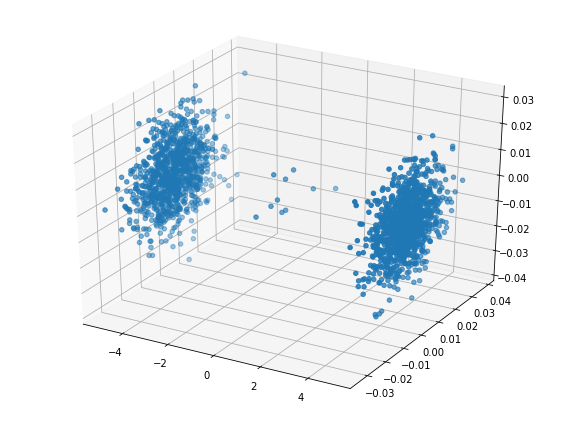

In [4]:
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:,0], X[:,1], X[:,2])
plt.tight_layout()

# Create forest

In [5]:
forest = []

for _ in range(numtrees):
    tree = rrcf.RCTree(X)
    forest.append(tree)

# Compute Disp and CoDisp

In [6]:
avg_disp = pd.Series(0.0, index=np.arange(n))
avg_codisp = pd.Series(0.0, index=np.arange(n))
avg_depth = pd.Series(0.0, index=np.arange(n))

for tree in forest:
    disp = pd.Series({k:tree.disp(v) for k,v in tree.leaves.items()})
    codisp = pd.Series({k:tree.codisp(v) for k,v in tree.leaves.items()})
    depth = pd.Series({k:v.d for k,v in tree.leaves.items()})
    avg_disp += disp
    avg_codisp += codisp
    avg_depth += depth
avg_disp /= numtrees
avg_codisp /= numtrees

# Plot Disp

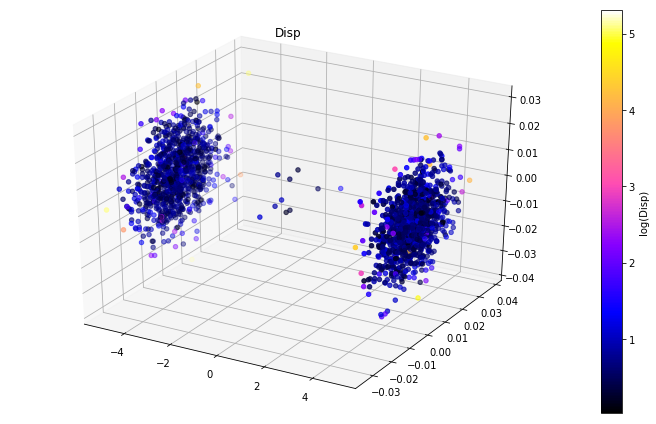

In [7]:
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111, projection='3d')
sc = ax.scatter(X[:,0], X[:,1], X[:,2], c=np.log(avg_disp.sort_index().values), cmap='gnuplot2')
plt.colorbar(sc, label='log(Disp)')
plt.title('Disp')
plt.tight_layout()

# Plot CoDisp

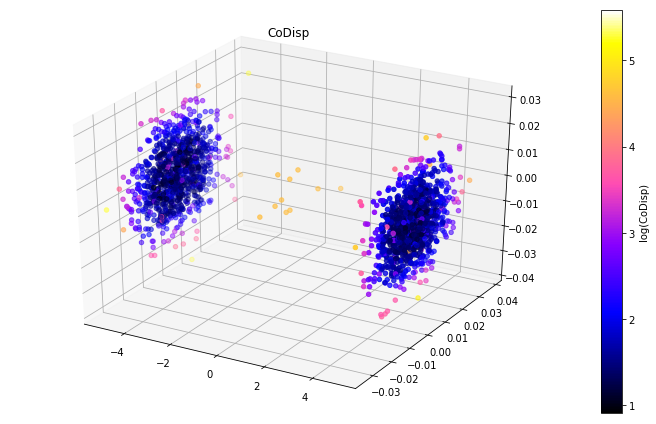

In [8]:
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111, projection='3d')
sc = ax.scatter(X[:,0], X[:,1], X[:,2], c=np.log(avg_codisp.sort_index().values), cmap='gnuplot2')
plt.colorbar(sc, label='log(CoDisp)')
plt.title('CoDisp')
plt.tight_layout()

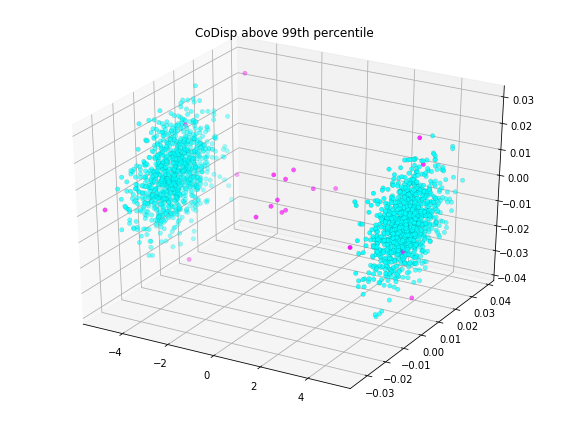

In [9]:
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111, projection='3d')
sc = ax.scatter(X[:,0], X[:,1], X[:,2], linewidths=0.1, edgecolors='k',
                c=(avg_codisp > avg_codisp.quantile(0.99)).astype(float), cmap='cool')
plt.title('CoDisp above 99th percentile')
plt.tight_layout()

# Plot Depth

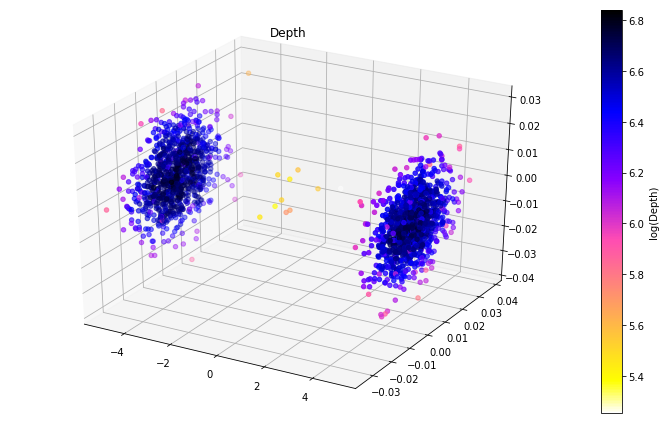

In [10]:
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111, projection='3d')
sc = ax.scatter(X[:,0], X[:,1], X[:,2], c=np.log(avg_depth.sort_index().values), cmap='gnuplot2_r')
plt.colorbar(sc, label='log(Depth)')
plt.title('Depth')
plt.tight_layout()

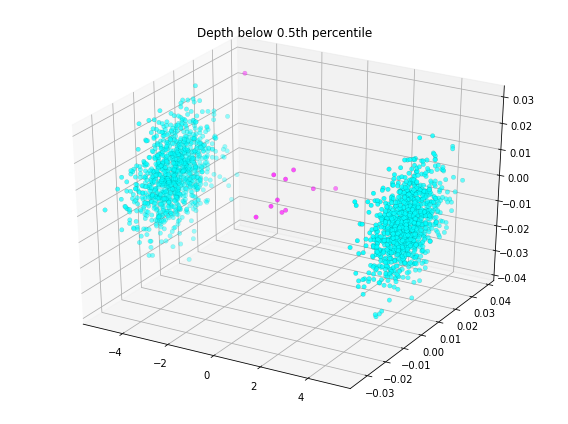

In [11]:
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111, projection='3d')
sc = ax.scatter(X[:,0], X[:,1], X[:,2], linewidths=0.1, edgecolors='k',
                c=(avg_depth < avg_depth.quantile(0.005)).astype(float), cmap='cool')
plt.title('Depth below 0.5th percentile')
plt.tight_layout()

In [12]:
avg_disp = avg_disp.sort_index()
avg_codisp = avg_codisp.sort_index()
avg_depth = avg_depth.sort_index()

In [13]:
avg_disp[:1000].mean(), avg_disp[1000:2000].mean(), avg_disp[2000:].mean()

(2.7271750000000003, 3.223225, 2.2)

In [14]:
avg_codisp[:1000].mean(), avg_codisp[1000:2000].mean(), avg_codisp[2000:].mean()

(7.927202998435186, 8.554238806318118, 99.985)

In [15]:
avg_depth[:1000].mean(), avg_depth[1000:2000].mean(), avg_depth[2000:].mean()

(686.386, 712.716, 248.1)